In [1]:
from sympy import *
import heppackv0 as hep

Reading heppackv0.py

Done


In [2]:
E1,M1,m,g=symbols('E1 M1 m g',positive=True)
theta,c1,c2=symbols('theta c1 c2',real=True)

###   Production of longitudinal $W$-Bosons, investigation of amplitudes violating unitarity.

###  1) Standard weak interaction
<img src="AbbeeWWnb-1.pdf" width="200"/>

$$e^-_+(k_1)+e^+_+(p_1)\to W^-_0(k_2)+W^+_0(p_2)$$ 

In [3]:
k1=[E1,m,0,0]
p1=[E1,m,pi,pi]
k2=[E1,M1,theta,0]
p2=[E1,M1,pi-theta,pi]

The amplitude is calculated from

$-\imath T_{fi}=\bar{v}(p_1)\frac{-\imath g}{\sqrt{2}}\gamma^\mu\frac{1-\gamma_5}{2}\epsilon_\mu^*(p_2)
\frac{\imath\,\not{q}}{q^2}\epsilon^*_\nu(k_2)\frac{-\imath g}{\sqrt{2}}\gamma^\nu\frac{1-\gamma_5}{2}u(k_1)$

$T_{fi}=\frac{g^2}{2}\bar{v}(p_1)\frac{1+\gamma_5}{2}\not{\!\epsilon}^*(p_2)\frac{\not{q}}{q^2}
\not{\!\epsilon}^*(k_2)\frac{1-\gamma_5}{2}u(k_1)$

valid for all helicities of the fermions and bosons.

In [4]:
kin=hep.fourvec(k1)
kout=hep.fourvec(k2)

In [5]:
qdag=hep.dag(kout)-hep.dag(kin)

In [6]:
epsk2dag=hep.dag(hep.polbar(k2,0))
epsp2dag=hep.dag(hep.polbar(p2,0))

In [7]:
core=epsp2dag*qdag*epsk2dag

Evaluate $(q^2 2/g^2) T_{fi}$ for the helicities quoted above after line [2]

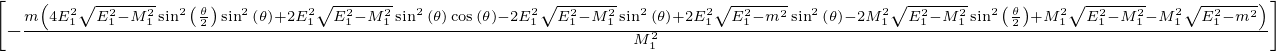

In [8]:
T1v1=simplify(hep.vbar(p1,1)*hep.projpl*core*hep.projm*hep.u(k1,1));T1v1

multiply by $M_1^2=M_W^2$ and divide by $m$ in order to get the high energy limit of the long expression in brackets.

In [9]:
T1v2=simplify((T1v1*M1**2/m).subs(m,0).subs(M1,0));T1v2

Divide by $q^2=-2E_1^2(1-\cos\theta)$ and restore the factors $m,M_1^2,g^2/2$. Sympy cannot simplify
$\sin^2\theta/(1-\cos\theta)$ to $(1+\cos\theta)$, therefore next line inserted by hand.

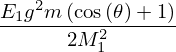

In [10]:
T1=g**2/2*m/M1**2*E1*(1+cos(theta));T1

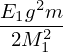

In [11]:
T10=g**2*m*E1/2/M1**2;T10

Amplitude grows $\sim E_1$. The isotropic part $T_{1,0}=g^2 mE_1/2M_1^2$ may be cancelled by a scalar particle $s$-channel
amplitude.

### 2) New particle in $s$-channel
<img src="AbbeeWWnb-2.pdf" width="200"/>

$$e^-_+(k_1)+e^+_+(p_1)\to W^-_0(k_2)+W^+_0(p_2)$$


$-\imath T_{fi}=\bar{v}(k_1)u(p_1)(-\imath g_{\phi ee})
\frac{-\imath}{s-M_\phi^2}
(-\imath g_{\phi WW}) g^{\mu\nu}\epsilon^*_\mu(k_2)\epsilon^*_\nu(p_2)$

$T_{fi}=-g_{\phi ee}g_{\phi WW}\bar{v}(k_1)u(p_1)\epsilon^*(k_2)\cdot\epsilon^*(p_2)/(s-M_\phi^2)$

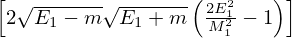

In [12]:
T2v1=hep.vbar(k1,1)*hep.u(p1,1)*hep.dotprod4(hep.polbar(k2,0),hep.polbar(p2,0));T2v1

Divide by propagator $4E_1^2-M_\phi^2$  and get the high energy limit of the amplitude Amplitude without sign an couplings

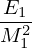

In [13]:
T2v2=E1/M1**2;T2v2

$T_2=-g_{\phi ee}g_{\phi WW}E_1/M_1^2$. 

$T_{1,0}+T_2=0$ for $g_{\phi ee}g_{\phi WW}=T_{1,0}/T_{2,v2}$

$c_{12}=g_{\phi ee}g_{\phi WW}$

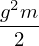

In [14]:
c12=simplify(T10/T2v2);c12

$T_2$ determines only  the product of the scalar couplings. The study of $W^-\phi^0$ production helps to calculate
$g_{\phi ee}$ and $g_{\phi WW}$ separately.

### 3) $\bar{\nu} e\to W^-\phi^0$ via  $s$-channel
<img src="AbbeeWWnb-3.pdf" width="200"/>
$$e^-_+(k_1)+\bar{\nu}(p_\nu)\to W^-_0(p_2)+\phi^0(k_2)$$

$-\imath T_{fi}=\bar{v}(p_\nu)\frac{-\imath g}{\sqrt{2}}\gamma^\mu\frac{1-\gamma_5}{2}u(k_1)
(-\imath)\frac{g_{\mu\nu}-q_\mu q_\nu /M_W^2}{s-M_W^2}
(-\imath g_{\phi WW}) g^{\nu\sigma}\epsilon^*_\sigma(p_2)$

$T_{fi}=-\frac{g}{\sqrt{2}}j^\mu_w
\frac{g_{\mu\nu}-q_\mu q_\nu /M_W^2}{s-M_W^2}
g_{\phi WW}\epsilon^{*\nu}(p_2)$

with the weak current $j_w$ given by

$j^\mu_w=\bar{v}(p_\nu)\gamma^\mu\frac{1-\gamma_5}{2}u(k_1)$

In [15]:
pnu=[E1,0,pi,pi]

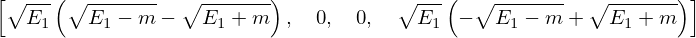

In [16]:
jweak=hep.vbuw(pnu,1,k1,1);jweak

With $\sqrt{E_1+m}\to \sqrt{E_1}\left(1+\frac{m}{2E_1}\right)$ this reduces at high energies to

In [17]:
jweak=[-m,0,0,m];jweak

which does not depend on $E_1$. Therefore $j_w^\mu g_{\mu\nu}\epsilon^{*\nu}/s$ is $\sim 1/E_1$
whereas the second term in the propagator makes the amplitude grow $\sim E_1$.

In [18]:
qvec=[2*E1,0,0,0];qvec

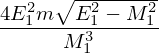

In [19]:
-hep.dotprod4(jweak,qvec)*hep.dotprod4(qvec,hep.polbar(p2,0))/M1**2

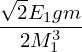

In [20]:
f3=g/sqrt(2)*m*E1/M1**3;f3

$c_2=g_{\phi WW}$

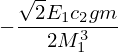

In [21]:
T3=-f3*c2;T3

### 4) $\bar{\nu} e\to W^-\phi^0$ via $t$-channel
<img src="AbbeeWWnb-4.pdf" width="200"/>
$$e^-_+(k_1)+\bar{\nu}(p_\nu)\to \phi^0(k_2)+W^-_0(p_2)$$

$-\imath T_{fi}=\bar{v}(p_\nu)\frac{-\imath g}{\sqrt{2}}\gamma^\nu\frac{1-\gamma_5}{2}
\epsilon^*_\nu(p_2)\frac{\imath\,\not{q}}{q^2}(-\imath g_{\phi ee})u(k_1)$

$T_{fi}=\frac{g}{\sqrt{2}}g_{\phi ee}\bar{v}(p_\nu)\frac{1+\gamma_5}{2}
\not{\!\epsilon}^*(p_2)\frac{\,\not{q}}{q^2}u(k_1)$

In [22]:
core1=epsp2dag*qdag

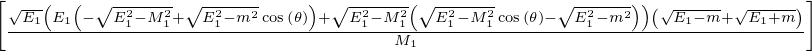

In [23]:
T4v1=simplify(hep.vbar(pnu,1)*hep.projpl*core1*hep.u(k1,1));T4v1

In [24]:
T4v2=simplify((M1*T4v1[0]).subs(m,0).subs(M1,0));T4v2

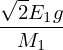

In [25]:
f4=simplify(T4v2*g/sqrt(2)/M1/(-2*E1**2*(1-cos(theta))));f4

$c1=g_{\phi ee}$

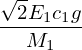

In [26]:
T4=f4*c1;T4

Unitarity condition reads now $T_3+T_4\to 0$ for $E_1\to \infty$ resulting in $f_4 g_{\phi ee}-f_3g_{\phi WW}$=0.

Therefore $g_{\phi WW}^2=c_{12}f_3/f_4$

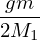

In [27]:
c1=simplify(sqrt(f3/f4*c12));c1

In [28]:
c2=simplify(f4/f3*c1);c2

The final result

$g_{\phi ee}=\large{\frac{gm}{2M_W}}$

$g_{\phi WW}=gM_W$

agrees with the couplings determined from spontaneous symmetry breaking. This is certainly not an accident.